In [4]:
from scipy import constants as const

# CONSTANTS

k = 1/(4*const.pi*const.epsilon_0)

### Oppgave 6

In [5]:
d = 0.20        # m
q = 0.250e-9    # C

E = k*q/((d/2)**2)
print(f'E = {E:.1e} N/C')

E = 2.2e+02 N/C


### Oppgave 7

In [6]:
d = 0.30    # m
E = 1150    # N/C

N = (d/2)**2 * E / (k*const.elementary_charge)

print(f'N > {N:.1e}')

N > 1.8e+10


### Oppgave 10

In [7]:
r = 0.10e-9 # m

U = k*const.elementary_charge**2/r

print(f'U = {U:.1e} J')
print(f'U = {U/const.elementary_charge:.1e} eV')

U = 2.3e-18 J
U = 1.4e+01 eV


### Oppgave 13

Innfører:

$
\tilde{r} = r/R
$

Dimensjonsløse variable:

$
\tilde{\rho}(\tilde{r}) = \frac{\rho(\tilde{r})}{4\rho_0}
\\
\tilde{Q}(\tilde{r}) = \frac{Q(\tilde{r})}{\frac{4 \pi \rho_0}{3}R^3}
\\
\tilde{E}(\tilde{r}) = \frac{E(\tilde{r})}{\frac{\rho_0}{3\epsilon_0}R}
\\
\tilde{V}(\tilde{r}) = \frac{V(\tilde{r})}{\frac{\rho_0}{3\epsilon_0}R^2}
$



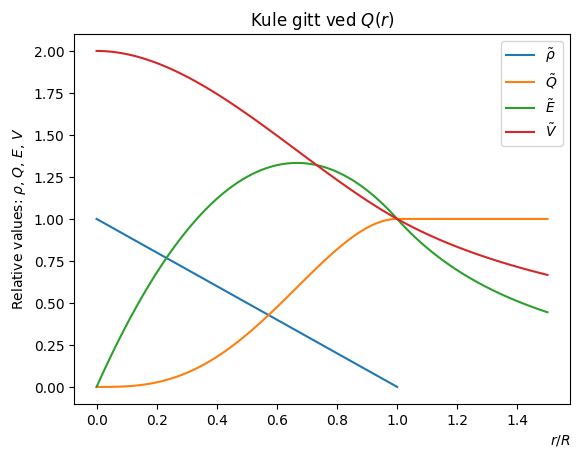

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# array of values for r_tilde for plotting
r_max = 3/2
npoints = 100
r_ax = np.linspace(0,r_max, npoints)        # from 0 to r = r_max
r_ax_R = [r if r <= R else R for r in r_ax] # from 0 to R

# constants
rho_0: float = 0.5
R: int = 1

# functions
rho = lambda r: 4*rho_0*(1 - r/R)
Q = lambda r: 4*const.pi*rho_0*(4/3*r**3 - 1/R*r**4)

def E(r):
    if r <= R:
        return rho_0/const.epsilon_0*(4/3*r - 1/R*r**2)
    else:
        return rho_0*R**3/(3*const.epsilon_0) * 1/r**2

def V(r):
    if r <= R:
        return rho_0/(3*const.epsilon_0)*(2*R**2 - 2*r**2 + 1/R*r**3)
    else:
        return rho_0/(3*const.epsilon_0)*(R**3/r)

# Relative functions
rho_tilde = lambda r_tilde: rho(r_tilde)/(4*rho_0)
Q_tilde = lambda r_tilde: Q(r_tilde)/(R**3*(4*const.pi*rho_0/3))
E_tilde = lambda r_tilde: E(r_tilde)/(R*rho_0/(3*const.epsilon_0))
V_tilde = lambda r_tilde: V(r_tilde)/(R**2*rho_0/(3*const.epsilon_0))

# values of functions
rho_vals = [rho_tilde(r) for r in r_ax_R]
Q_vals = [Q_tilde(r) for r in r_ax_R]
E_vals = [E_tilde(r) for r in r_ax]
V_vals = [V_tilde(r) for r in r_ax]

#plotting
plt.plot(r_ax_R, rho_vals, label=r"$\tilde{\rho}$")
plt.plot(r_ax, Q_vals, label=r"$\tilde{Q}$")
plt.plot(r_ax, E_vals, label=r"$\tilde{E}$")
plt.plot(r_ax, V_vals, label=r"$\tilde{V}$")

plt.legend()
plt.title(r"Kule gitt ved $Q(r)$")
plt.xlabel(r"$r/R$", loc="right")
plt.ylabel(r"Relative values: $\rho$, $Q$, $E$, $V$")
plt.show()